In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
#import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [7]:
x_train /= 255
x_test /= 255

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2115 - accuracy: 0.9366
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0844 - accuracy: 0.9749
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0598 - accuracy: 0.9809
Epoch 4/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0464 - accuracy: 0.9847
Epoch 5/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0367 - accuracy: 0.9876
Epoch 6/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0277 - accuracy: 0.9911
Epoch 7/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0259 - accuracy: 0.9914
Epoch 8/10
1875/1875 [==============================] - 205s 109ms/step - loss: 0.0235 - accuracy: 0.9917
Epoch 9/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0194 - accuracy: 0.9934
Epoch 10/10
1875/1875 [==============================] - 34s 1

In [10]:
test_loss_digit, test_acc_digit=model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0716 - accuracy: 0.9837


6


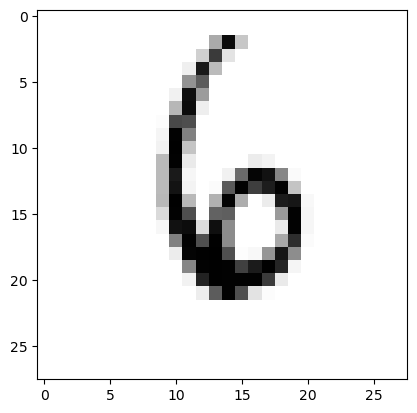

In [11]:
import matplotlib.pyplot as plt
image_index = 6900
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [12]:
print('Digit MNIST Test accuracy:', round(test_acc_digit,4))

Digit MNIST Test accuracy: 0.9837


In [13]:
#Predicting the labels-DIGIT
y_predict = model.predict(x_test)


In [15]:
y_predict

array([[8.3212465e-12, 1.5599532e-12, 2.4193819e-08, ..., 9.9999988e-01,
        4.2141846e-10, 2.7754715e-11],
       [3.6320353e-11, 8.2063335e-11, 1.0000000e+00, ..., 1.2769303e-19,
        6.8436101e-18, 1.4993834e-19],
       [2.7144403e-13, 1.0000000e+00, 5.0894913e-12, ..., 5.2688268e-08,
        4.7941931e-08, 2.0039942e-12],
       ...,
       [1.2372778e-22, 7.0216477e-14, 1.4413187e-15, ..., 1.4751414e-11,
        7.2644502e-10, 1.7398003e-07],
       [2.5929708e-12, 3.3446324e-20, 5.1092359e-23, ..., 6.4687705e-21,
        1.7623536e-08, 4.7041096e-20],
       [4.5172681e-12, 4.7212802e-19, 5.9703231e-10, ..., 3.6874380e-22,
        2.4154200e-13, 3.8941559e-17]], dtype=float32)

In [52]:
y_predicts=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test, axis=0)

In [53]:
y_test_digit_eval

7

In [61]:
y_predicts[8]

5

In [62]:
y_test_digit_eval

7

In [63]:
y_predicts[8]

5

In [64]:
y_test_digit_eval

7

In [65]:
y_pre=pd.DataFrame(y_predicts)

In [66]:
y_pre

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [67]:
y_test_digit_eval

7

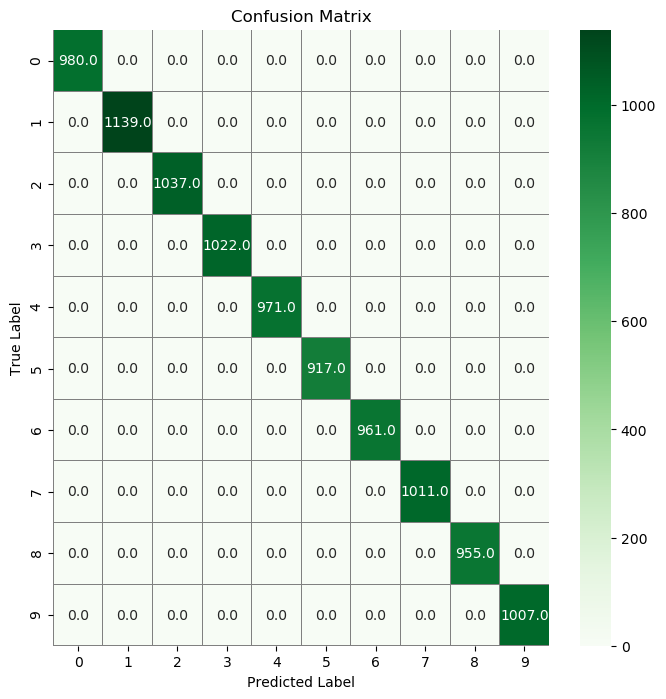

In [71]:
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

#Y_true = np.argmax(y_val,axis = 0) 

confusion_mtx = confusion_matrix(y_predicts, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [72]:
from sklearn.metrics import classification_report

print(classification_report( Y_pred_classes,y_predicts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1139
           2       1.00      1.00      1.00      1037
           3       1.00      1.00      1.00      1022
           4       1.00      1.00      1.00       971
           5       1.00      1.00      1.00       917
           6       1.00      1.00      1.00       961
           7       1.00      1.00      1.00      1011
           8       1.00      1.00      1.00       955
           9       1.00      1.00      1.00      1007

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

